In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing


In [2]:
sales = pd.read_csv('Advertising.csv', index_col=0)
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

TV intercept : 7.0326
TV slope     : 0.0475 


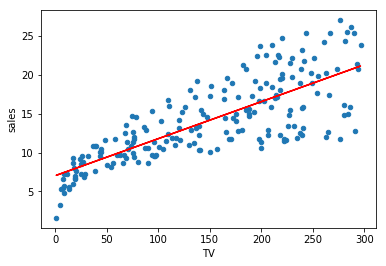

In [4]:
x = sales[['TV']]     #convert to 2D
y = sales['sales']
model.fit(x, y)

print("TV intercept : {:.4f}".format(model.intercept_))
print("TV slope     : {:.4f} ".format(model.coef_[0]))

sales.plot.scatter(x='TV', y='sales')
plt.plot(x, model.predict(x), c='red')
plt.show();

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_tv = mean_squared_error(y, model.predict(x))
r2_scoretv = r2_score(y,model.predict(x))

print("MSE for TV      : {:.4f}".format(mse_tv))
print("R2 Score for TV : {:.4f}".format(r2_scoretv))

MSE for TV      : 10.5127
R2 Score for TV : 0.6119


Radio intercept : 9.3116
Radio slope     : 0.2025 


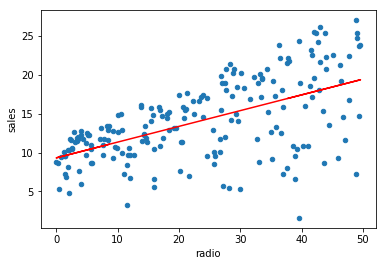

In [6]:
x = sales[['radio']]     #convert to 2D
y = sales['sales']
model.fit(x, y)

print("Radio intercept : {:.4f}".format(model.intercept_))
print("Radio slope     : {:.4f} ".format(model.coef_[0]))

sales.plot.scatter(x='radio', y='sales')
plt.plot(x, model.predict(x), c='red')
plt.show();

In [7]:
mse_radio = mean_squared_error(y, model.predict(x))
r2_scoreradio = r2_score(y,model.predict(x))

print("MSE for Radio      : {:.4f}".format(mse_radio))
print("R2 Score for Radio : {:.4f}".format(r2_scoreradio))

MSE for Radio      : 18.0924
R2 Score for Radio : 0.3320


Newspaper intercept : 12.3514
Newspaper slope     : 0.0547 


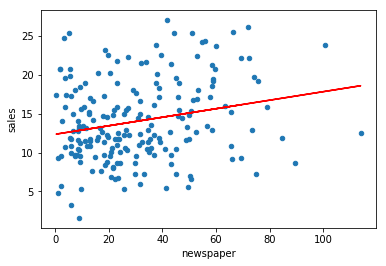

In [8]:
x = sales[['newspaper']]     #convert to 2D
y = sales['sales']
model.fit(x, y)

print("Newspaper intercept : {:.4f}".format(model.intercept_))
print("Newspaper slope     : {:.4f} ".format(model.coef_[0]))

sales.plot.scatter(x='newspaper', y='sales')
plt.plot(x, model.predict(x), c='red')
plt.show();

In [9]:
mse_news = mean_squared_error(y, model.predict(x))
r2_scorenews = r2_score(y,model.predict(x))

print("MSE for Newspaper      : {:.4f}".format(mse_news))
print("R2 Score for Newspaper : {:.4f}".format(r2_scorenews))

MSE for Newspaper      : 25.6740
R2 Score for Newspaper : 0.0521


## Multilinear Regression

In [10]:
X = sales[['TV', 'radio','newspaper']]
y = sales['sales']

model.fit(X,y)

print("MLR slope       :",model.coef_[:3])
print("MLR intercept   : {:.4f}".format(model.intercept_))
print("MSE of MLR      : {:.4f}".format(mean_squared_error(y,model.predict(X))))
print("R2 Score of MLR : {:.4f}".format(r2_score(y,model.predict(X))))

MLR slope       : [ 0.04576465  0.18853002 -0.00103749]
MLR intercept   : 2.9389
MSE of MLR      : 2.7841
R2 Score of MLR : 0.8972


Introduce Features Scaling

In [11]:
from sklearn.preprocessing import PowerTransformer

scaled_X = PowerTransformer().fit(X)
scaled_X = scaled_X.transform(X)
scaled_X[:4,:]


array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643]])

In [12]:
model_scaled = model.fit(scaled_X,y)

r2score = r2_score(y, model_scaled.predict(scaled_X))
mse_mlr = mean_squared_error(y, model_scaled.predict(scaled_X))

print("MSE of MLR      : {:.4f}".format(mse_mlr))
print("R2 Score of MLR : {:.4f}".format(r2score))
print("TV MLR          : {:.4f}".format(model_scaled.coef_[0]))
print("Radio MLR       : {:.4f}".format(model_scaled.coef_[1]))
print("Newspaper MLR   : {:.4f}".format(model_scaled.coef_[2]))


MSE of MLR      : 2.5064
R2 Score of MLR : 0.9075
TV MLR          : 3.9708
Radio MLR       : 2.7642
Newspaper MLR   : 0.0643


The model give better prediction after scaling